In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer
import utils

import importlib

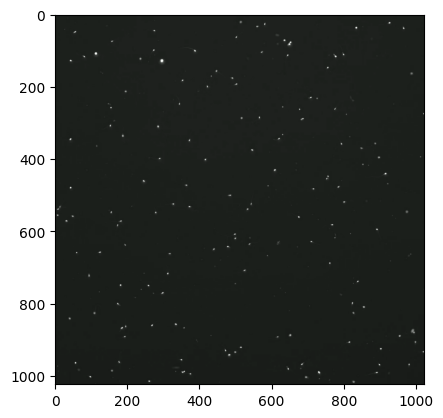

In [2]:
videofile = "combined_video.mp4"

#videofile = "ExampleVideos/10X Ph- 9Fps Wash Dil 1 16 P017me R1.mp4"
#videofile = "ExampleVideos/10X_-ph_9fps_R1.avi"

# Visualize the input
cap = cv2.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

plt.imshow(frame)

### Feed through the tracking pipeline

In [3]:
importlib.reload(tracker)
importlib.reload(utils)

frames = utils.loadVideo(videofile,as_gray=True)
f = tracker.determineCentroids(frames)
#t = tracker.trackCentroids(f)

#print(t.head())

Frame 263: 182 features


In [4]:
t1 = tracker.trackCentroids(f, search_range=21)

Frame 263: 182 trajectories present.


In [22]:
import trackpy as tp

def trackCentroidsWithVelocity(f, search_range=21, memory=3, adaptive_stop=0.2, adaptive_step=0.95):
    
    pred = tp.predict.NearestVelocityPredict(span=1)
    
    t = pred.link_df(f, search_range=search_range, memory=memory, predictor=pred, adaptive_stop=adaptive_stop, adaptive_step=adaptive_step)
    t = tp.filter_stubs(t, 15)

    # Change the column name of particle to sperm
    t = t.rename(columns={'particle': 'sperm'})

    t = t.reset_index(drop=True)
    
    return t

t2 = trackCentroidsWithVelocity(f, search_range=21)

Frame 263: 182 trajectories present.


### Use Visualizations

In [ ]:
importlib.reload(visualizer)

#visualizer.runVisualization(videofile, t1, visualization="flow")
visualizer.runVisualization(videofile, t2, visualization="flow")

(372, 3)
Video Finished.
(391, 3)
Video Finished.


In [16]:
utils.saveDataFrame(t1, "SavedOutputs/velocity_test_normal.csv")
utils.saveDataFrame(t1, "SavedOutputs/velocity_test.csv")

### Run Metrics

In [23]:
import metrics

gt = utils.loadDataFrame("combined_tracks.csv")

results1,result1_filter = metrics.computeMetrics(gt, t1)
results2,result2_filter = metrics.computeMetrics(gt, t2)

mets = ["DET","TRA","LNK","TF","IDF1","MOTA","HOTA"]

print("Results 1 vs Results 2")

for key in results1:
    if key in mets:
        print(f"{key}: {results1[key]}, {results2[key]}")

print("\nFiltered Results:")

for key in result1_filter:
    if key in mets:
        print(f"{key}: {result1_filter[key]}, {result2_filter[key]}")

Results 1 vs Results 2
DET: 0.950064234710645, 0.9492276896417795
TRA: 0.8776944467194734, 0.8827320106965358
LNK: 0.3922706185308764, 0.4367090510115129
TF: 0.8019049487650197, 0.8026860266526167
MOTA: 0.5434256520570045, 0.5449792357563263
HOTA: 0.684813830050806, 0.6981650913734548
IDF1: 0.651750067357386, 0.667509264485729

Filtered Results:
DET: 0.9099987650763595, 0.9201498374017206
TRA: 0.8424362823424882, 0.8592389707726371
LNK: 0.38893954465075153, 0.4503895888594165
TF: 0.7664003407559395, 0.7790640298551734
MOTA: 0.4202445148808299, 0.443913884658132
HOTA: 0.6220492006290004, 0.6457152161781394
IDF1: 0.5916824507946965, 0.6168789335447743
